In [1]:
%pylab inline
import snrlightcurve_freqparam as snr_ind
import matplotlib.gridspec as gridspec
reload(snr_ind)
import g19
if 1:        
    plt.rcdefaults()
    plt.rcParams.update({'figure.autolayout':'True'})
    plt.rcParams.update({'figure.autolayout':'True'})
    plt.rcParams.update({'font.size': 18})
    plt.rcParams.update({'mathtext.fontset':'stixsans'})
    plt.rcParams.update({'mathtext.default':'regular'})
    plt.rcParams.update({'axes.linewidth': 1.5})
    plt.rcParams.update({'xtick.major.size': 5})
    plt.rcParams.update({'xtick.major.width': 1.25 })
    plt.rcParams.update({'xtick.minor.size': 2.5})
    plt.rcParams.update({'xtick.minor.width': 1.25 })
    plt.rcParams.update({'ytick.major.size': 5})
    plt.rcParams.update({'ytick.major.width': 1.25 })
    plt.rcParams.update({'ytick.minor.size': 2.5})
    plt.rcParams.update({'ytick.minor.width': 1.25 })

import time as tm
import datetime as dt

##EXTENSION FILE PATHS
#fileext_CommitteeMeet = '/Users/sumits2k/Desktop/Research/SNResearch2/RadioSNRs/SN1885/Writeups/Sarbadhicary2016_SN1885/'
#fileext_SantaCruz = '/Users/sumits2k/Desktop/TALKS/'
fileext = '/Users/sumits2k/Desktop/Research/SNResearch2/RadioSNRs/SN1885/Sarba2017_SN1885/AASTEX6_Writeup/'

Populating the interactive namespace from numpy and matplotlib


## Mch and sub Mch models

In [25]:
#Wooseley (2010) models
subch_ek = np.array([1.4,1.5,1.5,1.5,1.4,1.7,1.9,9.7e-3,0.2,0.33,\
                     1.3,1.4,1.4,1.2,1.2,1.4,1.3,1.7,\
                     1.1,1.3,1.2,1.4,0.034,0.19,0.24,0.99,1.2,0.97,1.2,1.1,1.3,1.7,0.75,0.94,1.0,1.1,1.4])

subch_m = np.array([1.15,1.16,1.16,1.19, 1.13,1.23,1.3,0.017,0.12,0.2,\
                    1.06,1.08,1.09,1.05,1.07,1.12,1.08,1.18,\
                   0.96,1.02,1.01,1.05,0.049,0.12,0.15,0.91,0.94,0.9,0.96,0.94,0.97,1.08,0.82,0.85,0.89,0.91,0.96])
#Deflagration models
def_ek = np.array([0.51,0.64,0.74, 0.8,0.81,0.84])
def_m = np.ones(6)*1.37

#PDD + DDT
ddt_ek  = np.array([1.02,1.08,1.12,1.16,1.24,1.25,1.31,1.36,1.4,1.45])
ddt_m = np.ones(ddt_ek.size)*1.37


## Parameter Space for SN 1885A, with velocity constraints

In [26]:
density = [0.01, 0.02, 0.03]
epse = 0.0001
pp = 2.2

fluxsn1885 = 0.0038*3.0 #mJy, Chomiuk's upper limit from document
dist = 0.785 #McConnachie 2005 - http://adsabs.harvard.edu/abs/2005MNRAS.356..979M
e_dist = 0.025
lumsn1885 = 1.0e24*1.2*fluxsn1885*dist*dist
print '6.23 GHz Luminosity of SN 1885A = ', lumsn1885, ' ergs/s/Hz'
yerr = 1.0e24*np.sqrt((2.4*fluxsn1885*dist*e_dist)**2.0)
rad1885 = 1.52 #Fesen07
raderr = 0.15
freq = 6.23e9 #Hz, observation from Laura

start = tm.time()
e51array = np.logspace(-1, 1, 800)
mejarray = np.linspace(0.1,2.0,800)
M, e = np.meshgrid(mejarray, e51array)
stat_1 = np.zeros((e51array.size, mejarray.size))
stat_2 = np.zeros((e51array.size, mejarray.size))
stat_3 = np.zeros((e51array.size, mejarray.size))

for i, e51 in enumerate(e51array):
    for j, mej in enumerate(mejarray):
        rad, lum, vel = snr_ind.lightcurve(n0=density[0], mej=mej, e51=e51, epse=epse, pp=pp, freq=freq, tsnap=127, sntype='ia')
        stat_1[i,j] = 1. if (lum<=lumsn1885) & (rad>=rad1885) & (vel>=12500.) else 0.
        rad, lum, vel = snr_ind.lightcurve(n0=density[1], mej=mej, e51=e51, epse=epse, pp=pp, freq=freq, tsnap=127, sntype='ia')
        stat_2[i,j] = 1. if (lum<=lumsn1885) & (rad>=rad1885) & (vel>=12500.) else 0.
        rad, lum, vel = snr_ind.lightcurve(n0=density[2], mej=mej, e51=e51, epse=epse, pp=pp, freq=freq, tsnap=127, sntype='ia')
        stat_3[i,j] = 1. if (lum<=lumsn1885) & (rad>=rad1885) & (vel>=12500.) else 0.


      

print 'RUNTIME = ',str(dt.timedelta(seconds=tm.time()-start))



6.23 GHz Luminosity of SN 1885A =  8.429958e+21  ergs/s/Hz
RUNTIME =  0:00:52.058062


### Plotting the parameter space

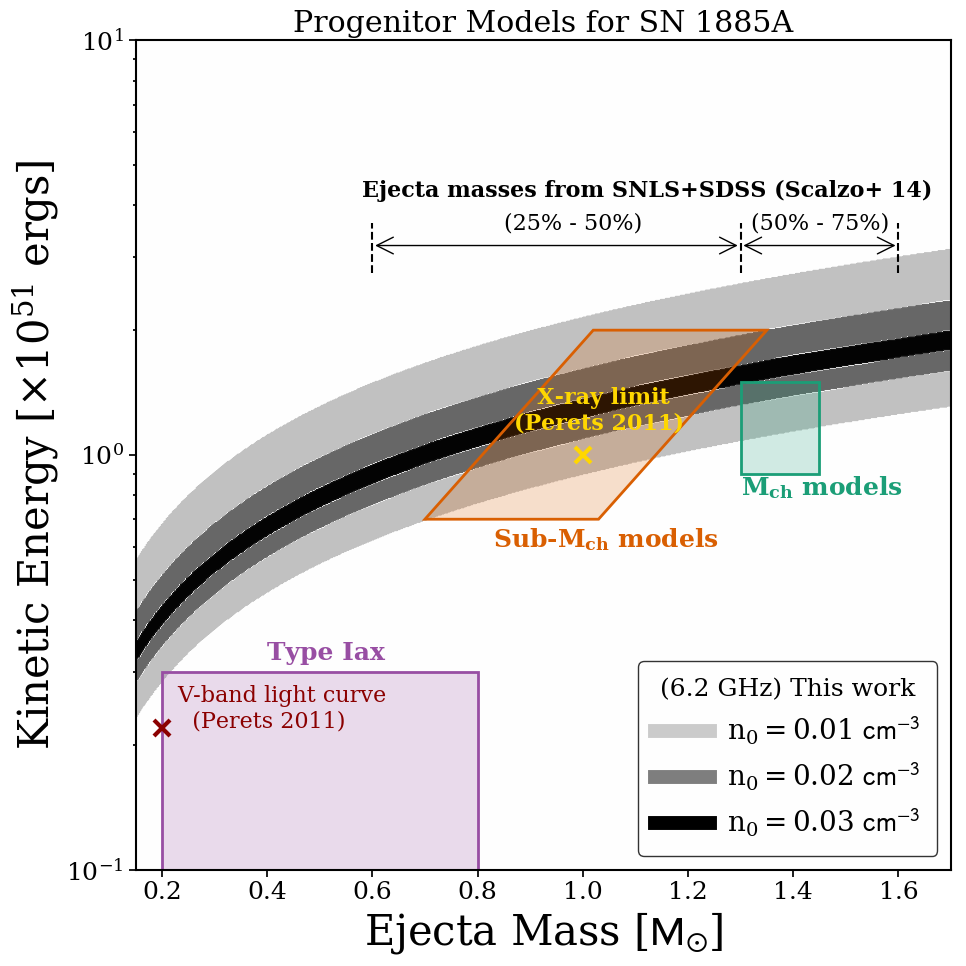

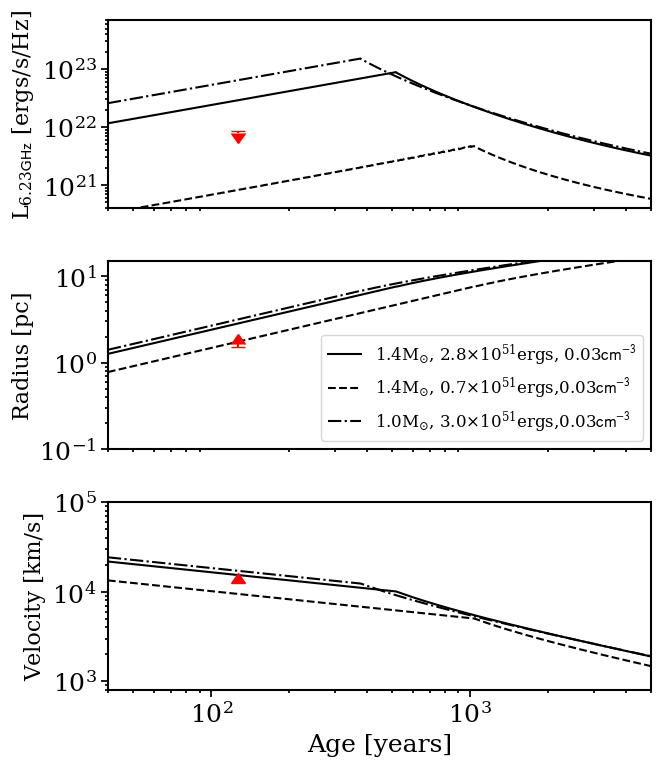

In [30]:
from matplotlib.patches import Rectangle, Polygon

#~~~~~~INPUT~~~~~~~~#
mej = 1.4
e51 = 2.8
n0=0.03
showInputOnContourPlot = False
showProgenitors=True

mejlow = 1.4
e51low = 0.7

mejhigh = 1.0
e51high = 3.0
#~~~~~~~~~~~~~~~~~~~#

#~~~~~~MODEL LIGHT CURVES~~~~~~~~#
tim, rad, lum, vel = snr_ind.lightcurve_Full(n0=n0, mej=mej, e51=e51, freq=freq, epse=epse, pp=pp, sntype='ia')
timlow, radlow, lumlow, vellow = snr_ind.lightcurve_Full(n0=n0, mej=mejlow, e51=e51low, freq=freq, epse=epse, pp=pp, sntype='ia')
timhi, radhi, lumhi, velhi = snr_ind.lightcurve_Full(n0=n0, mej=mejhigh, e51=e51high, freq=freq, epse=epse, pp=pp, sntype='ia')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#


plt.figure(figsize=(10,10))
#plt.rc('font', family='serif')
cs = plt.contourf(M,e,stat_1,40, cmap='Greys')
plt.contourf(M,e,stat_2,40,cmap='Greys',alpha=0.6)
plt.contourf(M,e,stat_3,40,cmap='Greys',alpha=0.4)

if showProgenitors:

    #~~~~~~~~~~~~~~PROGENITOR SCENARIOS~~~~~~~~~~~~~~~~~~~~#
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    #plt.plot(subch_m, subch_ek, 'x', color='y', ms=6.0, mew=2.0, label = r'Sub M$_{ch}$')
    rect_iax = Rectangle((0.2, 0.04), 0.6, 0.26, color='#984ea3', alpha=0.2)
    rect_iax2 = Rectangle((0.2, 0.04), 0.6, 0.26, color='#984ea3', fill=False, ls='-', lw=2.0)
    plt.gca().add_patch(rect_iax)
    plt.gca().add_patch(rect_iax2)
    plt.text(0.4, 0.32, 'Type Iax', color='#984ea3', weight='bold', fontsize=18)

    rect_mch = Rectangle((1.3, 0.9),0.15, 0.6, color='#1b9e77', alpha=0.2)
    rect_mch2 = Rectangle((1.3, 0.9),0.15, 0.6, color='#1b9e77', fill=False, ls='-', lw=2.0)
    plt.gca().add_patch(rect_mch)
    plt.gca().add_patch(rect_mch2)
    plt.text(1.3, 0.8, r'M$_{ch}$ models', weight='bold', color='#1b9e77', fontsize=18)

    plt.plot([1.0], [1.0], 'x', color='gold', ms=11.0, mew=3.0)
    plt.text(0.87, 1.15, '   X-ray limit\n(Perets 2011)', color='gold', weight='bold', fontsize=16)

    plt.plot([0.2], [0.22], 'x', color='darkred', ms=11.0, mew=3.0)
    plt.text(0.23, 0.22, 'V-band light curve\n  (Perets 2011)', color='darkred', fontsize=16)

    if False:
        rect_subch = Rectangle((0.8, 0.7),0.5, 1.1, color='#377eb8', alpha=0.2)
        rect_subch2 = Rectangle((0.8, 0.7),0.5, 1.1, color='#377eb8', fill=False, ls='-', lw=2.0)
        plt.gca().add_patch(rect_subch)
        plt.gca().add_patch(rect_subch2)
        plt.text(0.87, 0.7, r'Sub-M$_{ch}$ models', weight='bold', color='#377eb8', fontsize=18)

    rect_subch = Polygon(xy=np.array([[0.7,1.02,1.35,1.03], [0.7, 2.0, 2.0,0.7]]).T, color='#d95f02', closed=True, \
                         alpha=0.2)
    rect_subch2 = Polygon(xy=np.array([[0.7,1.02,1.35,1.03], [0.7, 2.0, 2.0,0.7]]).T, color='#d95f02', fill=False, \
                         ls='-', lw=2.0)
    #rect_subch2 = Polygon(xy=np.array([[0.7, 0.8],[1.02, 2.0], [1.23, 2.0], [1.01, 0.8]]), color='#377eb8', closed=False,\
           #               ls='--', lw=2.0)
    plt.gca().add_patch(rect_subch)
    plt.gca().add_patch(rect_subch2)
    plt.text(0.83, 0.6, r'Sub-M$_{ch}$ models', weight='bold', color='#d95f02', fontsize=18)

    plt.gca().annotate('', xy=(0.6, 3.2), xytext=(1.3, 3.2), arrowprops=dict(arrowstyle='<->', mutation_scale=30.))
    plt.gca().annotate('', xy=(1.3, 3.2), xytext=(1.6, 3.2), arrowprops=dict(arrowstyle='<->', mutation_scale=30.))
    plt.text(0.58, 4.2, 'Ejecta masses from SNLS+SDSS (Scalzo+ 14)', weight='bold', fontsize=16)
    plt.text(0.85, 3.5, '(25% - 50%)', fontsize=16)
    plt.text(1.32, 3.5, '(50% - 75%)', fontsize=16)
    plt.axvline(x=[0.6], ymin=0.72, ymax=0.78, color='k', ls='--')
    plt.axvline(x=[1.3], ymin=0.72, ymax=0.78, color='k', ls='--')
    plt.axvline(x=[1.6], ymin=0.72, ymax=0.78, color='k', ls='--')
    #Change 'alpha' with respect to stat_1. That means alpha=0.8 will give you the lighter color, not alpha=0.2                                                    'lw':2, 'color':'red'})
    if 0:
        plt.text(0.8, 1.5, 'Normal Ia\n(Badenes 07)', color='#CC3300', fontsize=18) 
        plt.axhspan(0.9, 1.4, color='#CC3300', alpha=0.5)

    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
#plt.vlines(x=1.4, ymin=0.9, ymax=1.4, color='r', lw=3.0)

plt.plot([],[], 'k', lw=10.0, alpha=0.2, label=r'$n_0 = $'+'{} '.format(str(density[0]))+r'$\rm{cm^{-3}}$')
plt.plot([],[], 'k', lw=10.0, alpha=0.5, label=r'$n_0 = $'+'{} '.format(str(density[1]))+r'$\rm{cm^{-3}}$')
plt.plot([],[], 'k', lw=10.0, alpha=1.0, label=r'$n_0 = $'+'{} '.format(str(density[2]))+r'$\rm{cm^{-3}}$')
#plt.plot([1.4], [1.0], 'rx', mew=2.0, ms=10.0)
#plt.axvline(x=1.4, ls='--', color='k', lw=1.0)
#plt.axhline(y=1.0, ls='--', color='k', lw=1.0)
if showInputOnContourPlot:
    plt.axvline(x=mej, ls='--', color='k', lw=1.0)
    plt.axhline(y=e51, ls='--', color='k', lw=1.0)
    plt.plot([mej], [e51], 'ro')
plt.yscale('log')
plt.ylim(0.1,10.0)
plt.xlim(0.15, 1.7)
plt.xlabel(r'Ejecta Mass [$\rm{M_{\odot}}$]', fontsize=30)
plt.ylabel(r'Kinetic Energy [$\times 10^{51}$ ergs]', fontsize=30)
plt.title('Progenitor Models for SN 1885A')
leg = plt.legend(numpoints=1, loc=4, \
           fontsize=20, borderpad = 0.6, handletextpad=0.6, labelspacing=0.5, edgecolor='inherit')
leg.set_title('(6.2 GHz) This work', prop={'size':18})
plt.savefig(fileext+'SN1885_Models.pdf', dpi=100)


fig, (ax0, ax1, ax2) = plt.subplots(figsize=(7,8), nrows=3)
plt.subplots_adjust(wspace=-0.5, hspace=0.0)
ax0.plot(tim[np.nonzero(lum)], lum[np.nonzero(lum)], 'k-')#, label=r'$1.4\ M_{\odot},\ 7\times10^{50}\ \rm{ergs},\ 0.1\ cm^{-3}$')
ax0.plot(timlow[np.nonzero(lumlow)], lumlow[np.nonzero(lumlow)], 'k--')
ax0.plot(timhi[np.nonzero(lumhi)], lumhi[np.nonzero(lumhi)], 'k-.')
ax0.errorbar([127],[lumsn1885], yerr=yerr, color='r', uplims=True, capsize=5)
#plt.text(155,6.0e21, 'SN 1885a', fontsize=12, color='r')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_ylabel('$L_{6.23 \mathrm{GHz}}$ [ergs/s/Hz]', fontsize=16)
ax0.set_xlim(40.,5000)
ax0.set_ylim(4.0e20,7.0e23)
ax0.set_xticks([])

ax1.plot(tim[np.nonzero(rad)], rad[np.nonzero(rad)], 'k-',\
        label=str(mej)+r'$M_{\odot}$, '+str(e51)+r'$\times 10^{51}$'+'ergs, '+str(n0)+r'$\rm{cm^{-3}}$')
ax1.plot(timlow[np.nonzero(radlow)], radlow[np.nonzero(radlow)], 'k--', \
         label=str(mejlow)+r'$M_{\odot}$, '+str(e51low)+r'$\times 10^{51}$'+'ergs,'+str(n0)+r'$\rm{cm^{-3}}$')
ax1.plot(timhi[np.nonzero(radhi)], radhi[np.nonzero(radhi)], 'k-.', \
         label=str(mejhigh)+r'$M_{\odot}$, '+str(e51high)+r'$\times 10^{51}$'+'ergs,'+str(n0)+r'$\rm{cm^{-3}}$')

ax1.errorbar([127], [1.5], yerr=0.15, color='r', lolims=True, capsize=5)
ax1.set_xscale('log')
ax1.set_yscale('log')
#ax1.set_xlabel('Age [years]', fontsize=16)
ax1.set_ylabel('Radius [pc]', fontsize=16)
ax1.set_xlim(40.,5000.)
ax1.set_ylim(0.1,15.)
ax1.legend(loc=4, fontsize=12)
ax1.set_xticks([])

ax2.plot(tim, vel, 'k-')
ax2.plot(timlow, vellow, 'k--')
ax2.plot(timhi, velhi, 'k-.')

ax2.errorbar([127], [12500], yerr=0.15, color='r', lolims=True, capsize=5)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Age [years]', fontsize=18)
ax2.set_ylabel('Velocity [km/s]', fontsize=16)
ax2.set_xlim(40.,5000.)
ax2.set_ylim(800, 1.0e5)
ax2.legend(loc=4, fontsize=12)
plt.tight_layout()
plt.show()
#plt.savefig(fileext+'LightCurves_SN1885a.pdf', dpi=100)

## G1.9+0.3 - velocity constraints

Velocity measurements are variable - the SNR has measured asymmetric expansion - so the shock velocity measured at the northern radio rim is smaller than the X-ray rims. Since I'm doing an average measurement of the integrated radio emission, I should try to use an average shock velocity based on the average expansion rate (taken from Green 2009) and perhaps compare it with the location-specific velocities.

In [9]:
reload(g19)
expan_rate = 0.65 # % per year, based on Green 2009
age_now, age_bef = 140, 140-16
rad_now = 2.0
total_expan = expan_rate*(age_now - age_bef)
rad_bef = rad_now*(1.0 - (total_expan/100.))
pc_to_km = 3.086e13 #km
yr_to_sec = 3.154e7 #s
vel_now = ((rad_now - rad_bef)*pc_to_km)/((age_now-age_bef)*yr_to_sec)
print 'Total expansion rate = ', total_expan, '% per year'
print 'Previous size = ', rad_bef, 'pc'
print 'Current shock velocity = ', vel_now, 'km/s'



def flux_to_lum(flux, fluxerr, dist, e_dist):
    lum = 1.0e24*1.2*flux*dist*dist
    lumerr = 1.0e24*np.sqrt((2.4*flux*dist*e_dist)**2.0 + (1.2*dist*dist*fluxerr)**2.0)
    return (lum, lumerr)

#PROPERTIES OF G1.9
lum1, e_lum1 = flux_to_lum(0.74*1.0e3, 0.038*1.0e3, 8.5e-3, 0.0)
#Condon (1998) 1.425 GHz assumed to be taken in 1993, taken from Green (2008)
lum2, e_lum2 = flux_to_lum(0.935*1.0e3, 0.047*1.0e3, 8.5e-3, 0.0)
#1.4 GHz Green (2008) measurement

print '1.425 GHz lumosity of G1.9 [ergs/s/Hz] = ', lum2, e_lum2

reload(g19)
density = [0.18]
freq=1.425e9
epse=1.0e-4
pp=2.2



mejarray_vel_0, y_e51_vel_high_0 = g19.Ekin_Mej_VelocityConstraint_G19(vel=5300., density=density[0], epse=epse, \
                                                                       pp=pp, age=age_now)
mejarray_vel_0, y_e51_vel_low_0 = g19.Ekin_Mej_VelocityConstraint_G19(vel=9700., density=density[0], epse=epse, \
                                                                      pp=pp, age=age_now)
#mejarray_vel_1, y_e51_vel_high_1 = g19.Ekin_Mej_VelocityConstraint_G19(vel=5300., density=density[1], epse=epse, pp=pp, age=age_now)
#mejarray_vel_1, y_e51_vel_low_1 = g19.Ekin_Mej_VelocityConstraint_G19(vel=9700., density=density[1], epse=epse, pp=pp, age=age_now)
#mejarray_vel_2, y_e51_vel_high_2 = g19.Ekin_Mej_VelocityConstraint_G19(vel=5300., density=density[2], epse=epse, pp=pp, age=age_now)
#mejarray_vel_2, y_e51_vel_low_2 = g19.Ekin_Mej_VelocityConstraint_G19(vel=9700., density=density[2], epse=epse, pp=pp, age=age_now)


mejarray_rad_0, y_e51_rad_high_0 = g19.Ekin_Mej_RadiusConstraint_G19(rad=2.0, density=density[0], epse=epse, \
                                                                     pp=pp, age=age_now)
mejarray_rad_0, y_e51_rad_low_0 = g19.Ekin_Mej_RadiusConstraint_G19(rad=1.79, density=density[0], epse=epse, \
                                                                    pp=pp, age=age_bef)
#mejarray_rad_1, y_e51_rad_high_1 = g19.Ekin_Mej_RadiusConstraint_G19(rad=2.0, density=density[1], epse=epse, pp=pp, age=age_now)
#mejarray_rad_1, y_e51_rad_low_1 = g19.Ekin_Mej_RadiusConstraint_G19(rad=1.79, density=density[1], epse=epse, pp=pp, age=age_bef)
#mejarray_rad_2, y_e51_rad_high_2 = g19.Ekin_Mej_RadiusConstraint_G19(rad=2.0, density=density[2], epse=epse, pp=pp, age=age_now)
#mejarray_rad_2, y_e51_rad_low_2 = g19.Ekin_Mej_RadiusConstraint_G19(rad=1.79, density=density[2], epse=epse, pp=pp, age=age_bef)

if 1:
    mejarray_lum_0, y_e51_lum_high_0 = g19.Ekin_Mej_LumConstraint_G19(lum_obs=lum1-e_lum1, density=density[0], epse=epse, \
                                                                      pp=pp, age=age_now)
    mejarray_lum_0, y_e51_lum_low_0 = g19.Ekin_Mej_LumConstraint_G19(lum_obs=lum2+e_lum2, density=density[0], epse=epse, \
                                                                     pp=pp, age=age_bef)
    #mejarray_lum_1, y_e51_lum_high_1 = g19.Ekin_Mej_LumConstraint_G19(lum_obs=lum1-e_lum1, density=density[1], epse=epse, pp=pp, age=age_now)
    #mejarray_lum_1, y_e51_lum_low_1 = g19.Ekin_Mej_LumConstraint_G19(lum_obs=lum2+e_lum2, density=density[1], epse=epse, pp=pp, age=age_bef)
    #mejarray_lum_2, y_e51_lum_high_2 = g19.Ekin_Mej_LumConstraint_G19(lum_obs=lum1-e_lum1, density=density[2], epse=epse, pp=pp, age=age_now)
    #mejarray_lum_2, y_e51_lum_low_2 = g19.Ekin_Mej_LumConstraint_G19(lum_obs=lum2+e_lum2, density=density[2], epse=epse, pp=pp, age=age_bef)





Total expansion rate =  10.4 % per year
Previous size =  1.792 pc
Current shock velocity =  12719.7209892 km/s
1.425 GHz lumosity of G1.9 [ergs/s/Hz] =  8.10645e+22 4.0749e+21


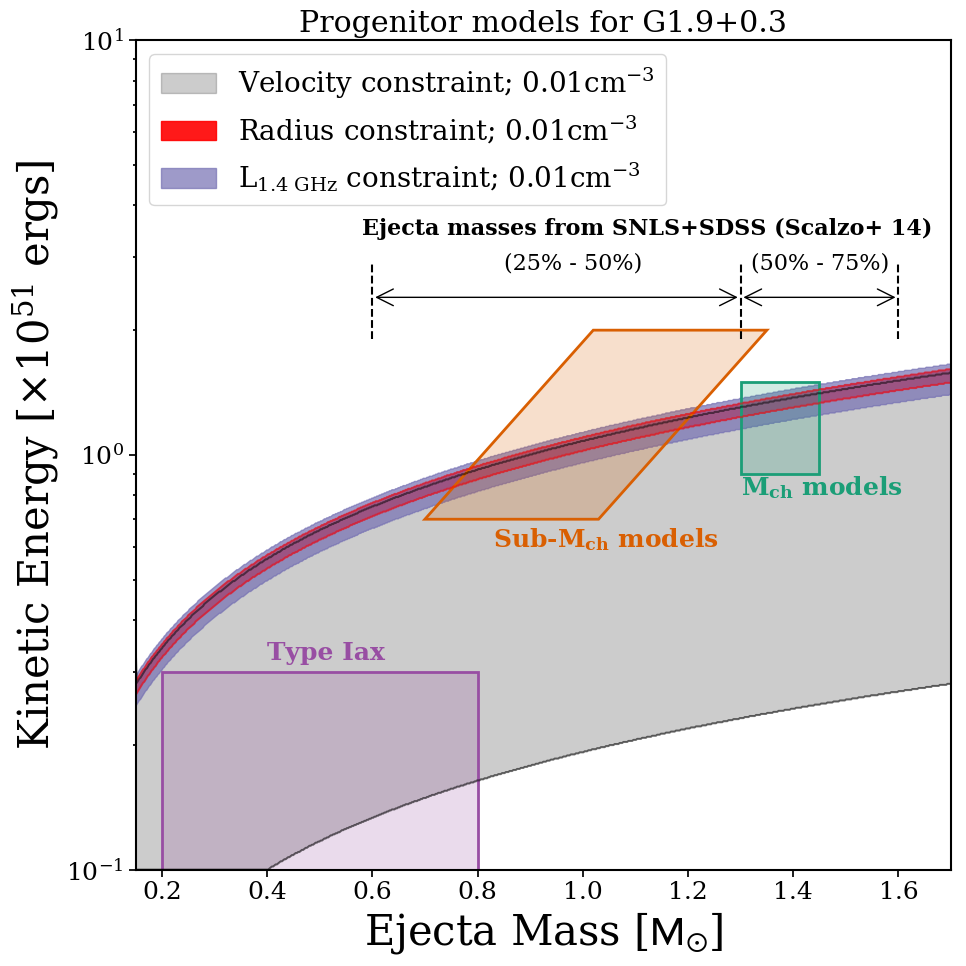

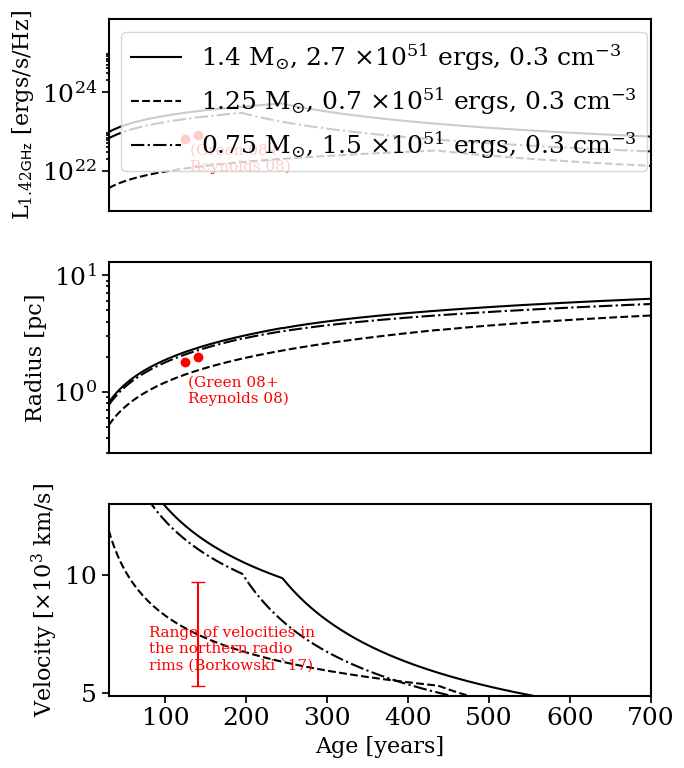

In [34]:
#~~~~~~INPUT~~~~~~~~#
mej = 1.4
e51 = 2.7
n0=0.3
showInputOnContourPlot = False
showProgenitors = True

mejlow = 1.25
e51low = 0.7

mejhigh = 0.75
e51high = 1.5
#~~~~~~~~~~~~~~~~~~~#

#~~~~~~MODEL LIGHT CURVES~~~~~~~~#
tim, rad, lum, vel = snr_ind.lightcurve_Full(n0=n0, mej=mej, e51=e51, freq=freq, epse=epse, pp=pp, sntype='ia')
timlow, radlow, lumlow, vellow = snr_ind.lightcurve_Full(n0=n0, mej=mejlow, e51=e51low, freq=freq, epse=epse, pp=pp, sntype='ia')
timhi, radhi, lumhi, velhi = snr_ind.lightcurve_Full(n0=n0, mej=mejhigh, e51=e51high, freq=freq, epse=epse, pp=pp, sntype='ia')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

plt.figure(figsize=(10, 10))
axes_1 = plt.gca()
units = [r'cm$^{-3}$']
if 1:
    axes_1.fill_between(x=mejarray_vel_0, y1=y_e51_vel_low_0, y2=y_e51_vel_high_0, \
                     color='k', alpha=0.2, label='Velocity constraint; {}'.format(str(density[0]))+units[0])
    plt.plot(mejarray_vel_0, y_e51_vel_low_0, 'k-', alpha=0.5)
    plt.plot(mejarray_vel_0, y_e51_vel_high_0, 'k-', alpha=0.5)
    #axes_1.fill_between(x=mejarray_vel_1, y1=y_e51_vel_low_1, y2=y_e51_vel_high_1, \
     #                color='#4daf4a', alpha=0.5, label='Velocity; {}'.format(str(density[1]))+units[0])
    #axes_1.fill_between(x=mejarray_vel_2, y1=y_e51_vel_low_2, y2=y_e51_vel_high_2, \
     #                color='#4daf4a', alpha=0.1, label='Velocity; {}'.format(str(density[2]))+units[0])
#d95f02
if 1:
    axes_1.fill_between(x=mejarray_rad_0, y1=y_e51_rad_low_0, y2=y_e51_rad_high_0, \
                color='r', alpha=0.9, label='Radius constraint; {}'.format(str(density[0]))+units[0])
    plt.plot(mejarray_rad_0, y_e51_rad_low_0, color='r', ls='-', alpha=0.5)
    plt.plot(mejarray_rad_0, y_e51_rad_high_0, color='r', ls='-', alpha=0.5)
    #axes_1.fill_between(x=mejarray_rad_1, y1=y_e51_rad_low_1, y2=y_e51_rad_high_1, \
     #           color='b', alpha=0.5, label='Radius; {}'.format(str(density[1]))+units[0])
    #axes_1.fill_between(x=mejarray_rad_2, y1=y_e51_rad_low_2, y2=y_e51_rad_high_2, \
     #           color='b', alpha=0.1, label='Radius; {}'.format(str(density[2]))+units[0])
if 1:
    axes_1.fill_between(x=mejarray_lum_0, y1=y_e51_lum_low_0, y2=y_e51_lum_high_0, \
                     color='#7570b3', alpha=0.7, label=r'$L_{1.4\ GHz}$'+' constraint; {}'.format(str(density[0]))+units[0])
    #axes_1.fill_between(x=mejarray_lum_1, y1=y_e51_lum_low_1, y2=y_e51_lum_high_1, \
     #                color='r', alpha=0.5, label='Lum; {}'.format(str(density[1]))+units[0])
    #axes_1.fill_between(x=mejarray_lum_2, y1=y_e51_lum_low_2, y2=y_e51_lum_high_2, \
     #                color='r', alpha=0.1, label='Lum; {}'.format(str(density[2]))+units[0])
#plt.axvline(x=1.4, ls='--', color='k', lw=1.0)
#plt.axhline(y=1.0, ls='--', color='k', lw=1.0)

if showProgenitors:

    #~~~~~~~~~~~~~~PROGENITOR SCENARIOS~~~~~~~~~~~~~~~~~~~~#
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    #plt.plot(subch_m, subch_ek, 'x', color='y', ms=6.0, mew=2.0, label = r'Sub M$_{ch}$')
    rect_iax = Rectangle((0.2, 0.04), 0.6, 0.26, color='#984ea3', alpha=0.2)
    rect_iax2 = Rectangle((0.2, 0.04), 0.6, 0.26, color='#984ea3', fill=False, ls='-', lw=2.0)
    axes_1.add_patch(rect_iax)
    axes_1.add_patch(rect_iax2)
    axes_1.text(0.4, 0.32, 'Type Iax', color='#984ea3', weight='bold', fontsize=18)

    rect_mch = Rectangle((1.3, 0.9),0.15, 0.6, color='#1b9e77', alpha=0.2)
    rect_mch2 = Rectangle((1.3, 0.9),0.15, 0.6, color='#1b9e77', fill=False, ls='-', lw=2.0)
    axes_1.add_patch(rect_mch)
    axes_1.add_patch(rect_mch2)
    axes_1.text(1.3, 0.8, r'M$_{ch}$ models', weight='bold', color='#1b9e77', fontsize=18)

    if False:
        rect_subch = Rectangle((0.8, 0.7),0.5, 1.1, color='#377eb8', alpha=0.2)
        rect_subch2 = Rectangle((0.8, 0.7),0.5, 1.1, color='#377eb8', fill=False, ls='-', lw=2.0)
        plt.gca().add_patch(rect_subch)
        plt.gca().add_patch(rect_subch2)
        plt.text(0.87, 0.7, r'Sub-M$_{ch}$ models', weight='bold', color='#377eb8', fontsize=18)

    rect_subch = Polygon(xy=np.array([[0.7,1.02,1.35,1.03], [0.7, 2.0, 2.0,0.7]]).T, color='#d95f02', closed=True, \
                         alpha=0.2)
    rect_subch2 = Polygon(xy=np.array([[0.7,1.02,1.35,1.03], [0.7, 2.0, 2.0,0.7]]).T, color='#d95f02', fill=False, \
                         ls='-', lw=2.0)
    #rect_subch2 = Polygon(xy=np.array([[0.7, 0.8],[1.02, 2.0], [1.23, 2.0], [1.01, 0.8]]), color='#377eb8', closed=False,\
           #               ls='--', lw=2.0)
    axes_1.add_patch(rect_subch)
    axes_1.add_patch(rect_subch2)
    axes_1.text(0.83, 0.6, r'Sub-M$_{ch}$ models', weight='bold', color='#d95f02', fontsize=18)

    axes_1.annotate('', xy=(0.6, 2.4), xytext=(1.3, 2.4), arrowprops=dict(arrowstyle='<->', mutation_scale=30.))
    axes_1.annotate('', xy=(1.3, 2.4), xytext=(1.6, 2.4), arrowprops=dict(arrowstyle='<->', mutation_scale=30.))
    axes_1.text(0.58, 3.4, 'Ejecta masses from SNLS+SDSS (Scalzo+ 14)', weight='bold', fontsize=16)
    axes_1.text(0.85, 2.8, '(25% - 50%)', fontsize=16)
    axes_1.text(1.32, 2.8, '(50% - 75%)', fontsize=16)
    axes_1.axvline(x=[0.6], ymin=0.64, ymax=0.73, color='k', ls='--')
    axes_1.axvline(x=[1.3], ymin=0.64, ymax=0.73, color='k', ls='--')
    axes_1.axvline(x=[1.6], ymin=0.64, ymax=0.73, color='k', ls='--')
    #Change 'alpha' with respect to stat_1. That means alpha=0.8 will give you the lighter color, not alpha=0.2 
    

if showInputOnContourPlot:
    axes_1.axvline(x=mej, ls='-', color='k', lw=1.0)
    axes_1.axhline(y=e51, ls='-', color='k', lw=1.0)
    axes_1.plot([mej], [e51], 'ko')
axes_1.set_title('Progenitor models for G1.9+0.3')
axes_1.set_xlim(0.15,1.7)
axes_1.set_ylim(0.1, 10.)
axes_1.set_xlabel(r'Ejecta Mass [$\rm{M_{\odot}}$]', fontsize=30)
axes_1.set_ylabel(r'Kinetic Energy [$\times 10^{51}$ ergs]', fontsize=30)
axes_1.set_yscale('log')
axes_1.legend(loc=2, fontsize=20)
plt.savefig(fileext+'G19_models.pdf', dpi=100)



plt.rc('font', family='serif')
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(7,8), nrows=3)
plt.subplots_adjust(wspace=0.5, hspace=0.0)

ax0.plot(tim[np.nonzero(lum)], lum[np.nonzero(lum)], 'k-', \
            label=str(mej)+r' $M_{\odot}$, '+str(e51)+r' $\times10^{51}$ ergs, '+str(n0)+r' cm$^{-3}$')
ax0.plot(timlow[np.nonzero(lumlow)], lumlow[np.nonzero(lumlow)], 'k--', \
            label=str(mejlow)+r' $M_{\odot}$, '+str(e51low)+r' $\times10^{51}$ ergs, '+str(n0)+r' cm$^{-3}$')
ax0.plot(timhi[np.nonzero(lumhi)], lumhi[np.nonzero(lumhi)], 'k-.', \
            label=str(mejhigh)+r' $M_{\odot}$, '+str(e51high)+r' $\times10^{51}$ ergs, '+str(n0)+r' cm$^{-3}$')

ax0.errorbar([age_bef],[lum1], yerr=e_lum1, xerr=0., fmt='o', color='r')
ax0.errorbar([age_now],[lum2], yerr=e_lum2, xerr=0., fmt='o', color='r')
ax0.text(130, 1.0e22, '(Green 08+\nReynolds 08)', color='r', fontsize=11)
#plt.text(155,6.0e21, 'SN 1885a', fontsize=12, color='r')
#ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_ylabel('$L_{1.42 \mathrm{GHz}}$ [ergs/s/Hz]', fontsize=16)
ax0.set_ylim(1.0e21,7.0e25)
ax0.set_xlim(30, 700)
ax0.set_xticks([])
ax0.legend()


ax1.plot(tim[np.nonzero(rad)], rad[np.nonzero(rad)], 'k-')
ax1.plot(timlow[np.nonzero(radlow)], radlow[np.nonzero(radlow)], 'k--')
ax1.plot(timhi[np.nonzero(radhi)], radhi[np.nonzero(radhi)], 'k-.')
ax1.errorbar([age_bef],[1.79], yerr=0., xerr=0., fmt='o', color='r')
ax1.errorbar([age_now],[2.0], yerr=0., xerr=0., fmt='o', color='r')
ax1.text(128, 0.8, '(Green 08+\nReynolds 08)', color='r', fontsize=11)
#plt.text(155,6.0e21, 'SN 1885a', fontsize=12, color='r')
#ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('Radius [pc]', fontsize=16)
ax1.set_xlim(30, 700)
ax1.set_ylim(0.3,13)
ax1.legend(fontsize=14)
ax1.set_xticks([])

ax2.plot(tim[np.nonzero(vel)], vel[np.nonzero(vel)]/1.0e3, 'k-')
ax2.plot(timlow[np.nonzero(vellow)], vellow[np.nonzero(vellow)]/1.0e3, 'k--')
ax2.plot(timhi[np.nonzero(velhi)], velhi[np.nonzero(velhi)]/1.0e3, 'k-.')
ax2.errorbar([age_now],[7500/1.0e3], yerr=[2200./1.0e3], color='r', fmt='', capsize=5)
#ax2.set_xscale('log')
#axes_4.set_yscale('log')
ax2.set_ylabel(r'Velocity [$\times 10^3$ km/s]', fontsize=16)
ax2.text(80, 6000/1.0e3, 'Range of velocities in\nthe northern radio\nrims (Borkowski `17)', color='r', fontsize=11)
ax2.set_xlim(30, 700)
ax2.set_ylim(4900/1.0e3,13000/1.0e3)
ax2.set_xlabel('Age [years]', fontsize=16)

plt.tight_layout()
#plt.savefig(fileext+'LightCurves_G19.pdf', dpi=100)
plt.show()


### Some basic calculations from Morlino & Caprioli 2012

/Users/sumits2k/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide


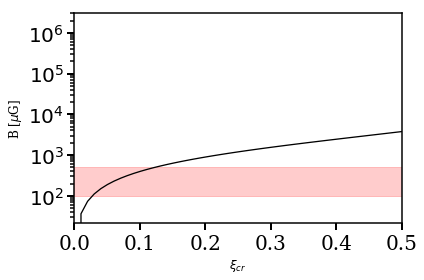

In [32]:
zeta = np.linspace(0, 1, 100)
rho = 1.0e-24 #gm/cm^-3
v = 1.0e4*1.0e5 #cm/s
x = 1.0e6*np.sqrt(pi*rho)*v*(zeta*(2-zeta))/((1-zeta)**1.5)

plt.plot(zeta, x, 'k-')
plt.axhspan(ymin=100, ymax=500, color='r', alpha=0.2)
plt.xlabel(r'$\xi_{cr}$', fontsize=12)
plt.ylabel(r'B [$\mu$G]', fontsize=12)
plt.yscale('log')
plt.xlim(0,0.5)
plt.show()

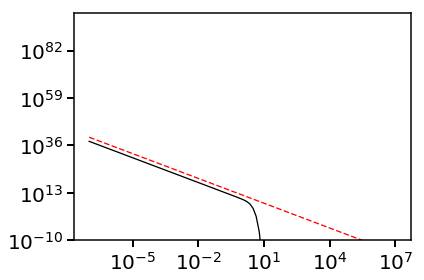

In [60]:
p = np.logspace(-7, 7, 100)
f = 1.0e10*(p**(-4))*((1+0.523*(p**(9.0/4.0)))**2)*np.exp(-(p**2))

plt.plot(p, f, 'k-')
plt.plot(p, 1.0e12*p**(-4), 'r--')
plt.ylim(1.0e-10, 1.0e100)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [72]:
tstar = 0.481
n0 = 0.18
mej = 1.4
e51 = 1.3

print 423*(e51**(-0.5))*(mej**(5.0/6.0))*(n0**(-1.0/3.0))

869.730204132
